<a/ id='top'></a>
# Homework 4: More Simulation and the Central Limit Theorem 
***

**Name**: 

***

This assignment is due on Moodle by **5 PM on Friday 26 October**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [1]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
1-stats.norm.cdf(-1/3)

0.63055865981823633

In [3]:
1-stats.norm.cdf(-2)

0.97724986805182079

In [2]:
stats.norm.ppf(1 - 0.025)

1.959963984540054

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
### [30 points] Problem 1 - Monte Carlo Estimation of Definite Integrals

One really cool application of random variables is using them to approximate integrals/area under a curve.  This method of approximating integrals is used frequently in computational science to approximate really difficult integrals that we never want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on a relatively simple integral. 

**Part A.**  Let $X$ be a random variable representing how delicious a pie you bake is, as measured by the **Deliciousness Index** (DI).  Suppose the probability density function for $X$ is described by the raised cosine probability density function:

$$
f(x) = \begin{cases}
         \dfrac{1}{\pi}\left(\cos{(x)} + 1\right) & 0 \leq x \leq \pi \\
         0                           & \text{otherwise}
         \end{cases}
$$

A Deliciousness Index of $\pi$ is the most delicious pie you can ever hope to create, and a DI of $0$ is the most disgusting pie you have ever tasted.  

Compute **by hand**, the integral of $f(x)$ for $0 \leq x \leq \dfrac{\pi}{2}$.  Write a sentence or two to interpret your result physically, in the context of this problem set-up.

$$ \int_0^{\frac{\pi}{2}} \frac{1}{\pi}*(cos(x) + 1)dx $$

$$ \frac{1}{\pi} \int_0^{\frac{\pi}{2}} (cos(x) + 1)dx $$

$$ \frac{1}{\pi} \Big[sin(x) + x \Big]_0^{\frac{\pi}{2}} $$

$$ \frac{1}{\pi} \Big(sin(\frac{\pi}{2}) + \frac{\pi}{2} - (sin(0) + 0) \Big) $$

$$ \frac{1}{\pi} (1 + \frac{\pi}{2}) $$

$$ \frac{1}{\pi} + \frac{1}{2} $$

$$ \boxed { \frac{2+\pi}{2\pi} } $$

This integral is the same as the CDF for $f(x)$ from $0$ to $\frac{\pi}{2}$. Therefor, we solved that $P(x \leq \frac{\pi}{2})= \frac{2+\pi}{2\pi} \approx 0.8183$

**Part B.** Suppose we sample a random variable $X$ from $U(0,\frac{\pi}{2})$ and another random variable $Y$ from $U(0,1)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,\frac{\pi}{2}] \times [0,1]$.  If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

Note that the box formed by the random variables $X$ and $Y$ has an area $A = \frac{\pi}{2}$. Because the area under the curve of within that square is $\frac{2+\pi}{2\pi}$, we can solve for the ratio of the area under the curve of the total area. If we have $n$ simulations and $n_c$ being the number that land under the curve, then the ratio is:

$$ \frac{n_c}{n} = \frac{\text{Area of Curve}}{\text{Area of Box}}$$

$$ \frac{n_c}{n} = \frac{(\frac{2+\pi}{2\pi})}{(\frac{\pi}{2})} = \frac{2(\pi+2)}{2\pi^2} = \frac{\pi+2}{\pi^2} \approx 0.5210 $$

This ratio value will give us the probability that a point falls under the curve within the bounds $[0,\frac{\pi}{2}] \times [0, 1]$. Similarly, we can use this ratio, as well as the area of the box, to calculate the area of the curve.

**Part C.** How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral?  If you need inspiration, check out the in-class notebook on Stochastic Simulation (#4), specifically, the exercise where we estimated $\pi$!

The process from **Part B** only the area of the first half of the curve. We can abstract this process to find the area under the curve for any interval. If we define $i$ such that $0 \leq i \leq \pi$, then could calculate the area under the curve from $[0,i]$ by simulating a bunch of points from $X \sim [0,i]$ and $Y \sim [0,1]$, finding the ratio of those that fell under the curve, and multiplying that ratio by the area of the box. 

**Part D.** Write a function `integrate` to compute an approximation to the definition integral $\int_0^{\text{ub}} f(x)dx$.  Your function should take as arguments:
1. `num_samples` -- the number of points to sample,
2. `ub` -- a number between $0$ and $\pi$ that is the upper bound of the integral, and
3. `isPlot` -- a Boolean flag for whether or not to display a plot of the results.

Your function should return an approximation of the definite integral by sampling $X$ from $U(0,\text{ub})$ and $Y$ from $U(0,1)$. For each random draw $(X,Y)$, define the random variable $Z$ that represents whether or not the sampled $Y$ value is less than $f(X)$ for the corresponding $X$ value.

Your function should perform three tasks: 

1. return the estimate of the value of the integral,
2. return the sample variance of the random variable $Z$ being simulated, using the np.var function, and
3. if `isPlot` is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

Run your simulation with `isPlot=True` and `ub=`$\frac{\pi}{2}$ for 1,000 samples so we can see your plot. Then, run your simulation (with `isPlot=False`) with at least 10,000 samples and estimate the value of the given integral.  Does your estimate agree with the exact value of the integral you computed in **Part A**? 

Using the code below, we can see that the simulated area $\sim 0.82$ is similar to the calculated value $0.8183$ from **Part A**. The recieved variance was $\sim 0.25$. 

In [4]:
# A function to calculate the value of the integral
def fx(x):
    return (np.cos(x) + 1) / np.pi

In [5]:
def PlotIntegrate(xs, ys, ub, binom):
    xaxis = np.arange(0, ub, 0.01)
    fxValues = fx(xaxis)
    colors = [(0,0,0,0.7) if ii else (0,0,0,0.05) for ii in binom]
    
    fix,ax = plt.subplots(1,1,figsize = (10,6))
    
    ax.scatter(x = xs, y = ys, c = colors)
    ax.plot(xaxis, fxValues, linewidth = 3, color = (0.99, 0, 0, 1))

In [6]:
def integrate(num_samples, ub, isPlot): # Finds the integration through simulation and ratios
    Z = np.zeros(num_samples)
    xs = np.random.uniform(0, ub, num_samples)   # Simulate n random X values between 0 and ub
    ys = np.random.uniform(0, 1, num_samples)    # Simulate n random Y values between 0 and 1
    
    fxValues = fx(xs) # Go through all random X values and calculate the curve value
    
    Z = ys <= fxValues     # Create a list of Bernoulli values if above line

    # If non-negative, is below curve. Else, is above curve.
    numUnderCurve = np.sum(Z)

    ratio = numUnderCurve / num_samples        # Calculate the ratio of points under curve to total points
    
    areaUnderCurve = ratio * ub    # Calculate the area under curve = area of box(1*ub) * ratio of samples under curve.
    
    var = np.var(Z)

    if isPlot:
        PlotIntegrate(xs, ys, ub, Z)
    return areaUnderCurve, var

0.807389311973 0.249804


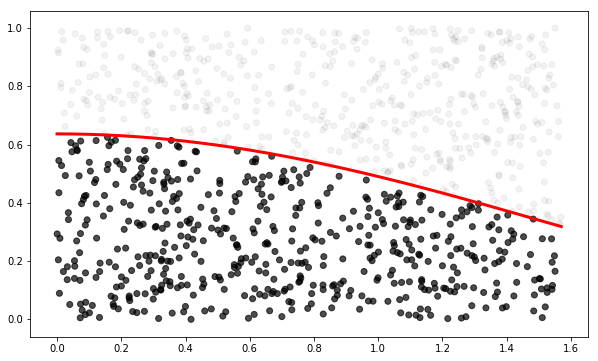

In [7]:
areaUnderCurve, var = integrate(1000, np.pi/2, True)
print(areaUnderCurve, var)

In [8]:
areaUnderCurve, var = integrate(10000, np.pi/2, False)
print("The area under the curve is {:0.4f}.".format(areaUnderCurve))
print("The variance for if each point lies under the curve is {:0.4f}".format(var))

The area under the curve is 0.8250.
The variance for if each point lies under the curve is 0.2494


**Part E.** In the simulation above, what is distribution of the random variable $Z$ that we're actually sampling? What is/are the parameters of this distribution?  

The distribution of Z is a bernoulli distribution where a point falling under the curve is counted as a success and falling outside is a failure. A point falls within the curve with probability $\frac{\pi+2}{\pi^2}$ so $Z$ can be written as $Z \sim Bern(\frac{\pi+2}{\pi^2})$.

**Part F.**  Compute the expected value of the random variable you described in **Part E** by hand.  Does this value agree with the exact value of the integral you computed in **Part A** and the estimated value you simulated in **Part D**? 

The expected value of a Bernoulli is p. Therefor, the expected value of Z is $\frac{\pi+2}{\pi^2} \approx 0.5210$. This value is the ratio, not the area under the curve, so it does not agree with **Part A**. To make it the same as the area under the curve, we would need to multiply this value by the area of the box (Area = $\frac{\pi}{2}$) to get $(\frac{\pi}{2})(\frac{\pi+2}{\pi^2}) \approx 0.8183$ which is the area under the curve.

**Part G.** Compute the variance of the random variable you described in **Part E** by hand.  Does this value agree with the sample variance observed in your simulation for **Part D**? 

The variance of a Bernoulli is p(1-p). Therefor the variance is $\Big(\frac{\pi+2}{\pi^2}\Big)\Big(1-\frac{\pi+2}{\pi^2}\Big) \approx 0.250.$ This is similar to the simulated value $ \sim 0.2499.$, so it does agree with the calculated value.

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
### [25 points] Problem 2 - Mmmm... Donuts...

<img src="http://astrokentico.s3.amazonaws.com/rojakdaily/media/1nichoras/homer%20simpson%20krispy%20kreme/main.jpg?ext=.jpg" style="width:300px;"/>

You bring many donuts (or _doughnuts_, if you will) to work to share with your coworkers at the Boulder Nuclear Power Planet. But due to the high levels of radiation there, they must be inspected for safety. In particular, if the mean level of radiation in a sample from your batch of donuts is above [200 mSv (millisievert)](#rad), then they are deemed unsafe and you must throw the whole batch away.

You know that historically donuts at the power plant have, on average, 190 mSv of radiation, with a standard deviation of 40 mSv. To test the donut radiation levels, you take the donut receipt and pick every fifth donut off it, and sample the radiation levels of those donuts. You end up sampling the radiation levels of 36 donuts out of the batch.

**Part A.** What is the probability that a donut batch is deemed unsafe?  You should at the very least set up and justify your calculation by hand (in Markdown/Mathjax), before executing any calculations in Python.

A donut batch is deemed unsafe if the radiation sample mean is above 200 mSv. Therefor, we must solve the probability $P(X > 200)$.

$$ P(\bar{x} > 200) = 1 - P(\bar{x} \leq 200) $$

Using the Box-Muller Transform, we can convert the sample mean to a normal distribution.

$$ Z = \frac{\bar{x}-\mu}{(\frac{\sigma}{\sqrt{n}})} = \frac{\bar{x}-190}{(\frac{40}{\sqrt{36}})} $$

We can now convert our probability to a normal distribution.

$$ P(\bar{x} > 200) = 1 - P(z = \frac{200 - 190}{(\frac{40}{\sqrt{36}})}) = 1 - P(z = \frac{3}{2}) = 1 - \Phi(\frac{3}{2})$$

Using the code below, we can solve the probability. The probability that the batch of donuts is unsafe is $\approx 0.0668$.

In [9]:
1 - stats.norm.cdf(3/2)

0.066807201268858085

**Part B.** You really do not want to throw away donuts that frequently, so you propose to store the donuts in a lead-lined donut box. But lead also is not very good for your health, so you are motivated to use the least amount of lead possible. What is the maximum mean $\mu$ of the donut radiation distribution such that the probability that we will throw donuts out due to safety concerns is at most 0.001? Assume that the variance and sample size remain the same as above.

Calculate this **by hand**, using Python only to perform arithmetic operations and compute critical values of a standard normal random variable.

Knowing the final probability, we will plug that value into the solved answer from the last question. The equation we are solving is then:

$$ 0.001 = 1 - P(z \leq \frac{200 - \mu}{(\frac{40}{6})}) $$

$$ 0.999 = P\Big(z \leq \frac{200 - \mu}{(\frac{40}{6})}\Big) $$

This probability above is a CDF of a normal, therefor we can solve what value the CDF will be at when the area is 0.999 using the code below.

$$ 3.0902 = \frac{200 - \mu}{(\frac{40}{6})} $$

$$ 200 - \mu = 20.601 $$

$$ \mu = 179.3987 $$

In [10]:
stats.norm.ppf(0.999)

3.0902323061678132

**Part C.**  Your supervisor at the plant decides that serving up donuts in a lead-lined box is a bad idea. Fair enough.

But she is still imposing the requirement that the probability of a batch of donuts being rejected must be less than 0.001. Suppose the mean and standard deviation are at their original values of $\mu = 190$ mSv and $\sigma = 40$ mSv. What is the minimum sample size to satisfy this requirement?

Calculate this **by hand**, using Python only to perform arithmetic operations and compute critical values of a standard normal random variable.

$$ 0.001 = 1 - P(\bar{x} <= 200) = 1 - P\Big(z \leq \frac{\bar{x} - \mu}{(\frac{\sigma}{\sqrt{n}})}\Big)$$

Plug in all the numbers we know in order to solve for n.

$$ 0.999 = P\Big(z \leq \frac{200 - 190}{(\frac{40}{\sqrt{n}})} \Big) $$

Again, the probability above is a CDF of a standard normal so we can find the corresponding x-value using stats.norm.ppf(). Then solve.

$$ 3.0902 = \frac{10}{(\frac{40}{\sqrt{n}})} $$

$$ 123.6093 = 10\sqrt{n} $$

$$ n = 152.7926 $$

In [11]:
print(stats.norm.ppf(0.999))
print((stats.norm.ppf(0.999)*4)**2)

3.09023230617
152.792571297


**Part D.** Can you think of any potential issues with using a normal distribution to model the radiation content of our donuts?

A potential problem with a normal distribution could be occur if the standard deviation is too wide. This would stretch out the normal curve and make it very flat. When we calculate values, if the spread is too wide then the results could be very different from the "real" values of the data, making them less useful. Along the same lines, if the average is close to zero and there is a wide standard deviation then the data could report negative radiation levels, which is not physically possible.

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
### [20 points] Problem 3 - Snappy McChatterson over here

**Part A:** Your friends are really texting a lot of messages to your Snap Chat. You start your stopwatch and record the time when each Snap Chat text message comes in. The data are found in `SnappedChats.csv`.

Load them in using whatever method you prefer, compute the time span between successive snaps, and plot a density histogram of those inter-snap arrival times.

Your histogram should be gold with black edges (sko buffs) and have 50 bins. Be sure to label your axes and include a legend.


In [12]:
filepath = "SnappedChats.csv"
dfSnapTimes = pd.read_csv(filepath,
              header = 0)

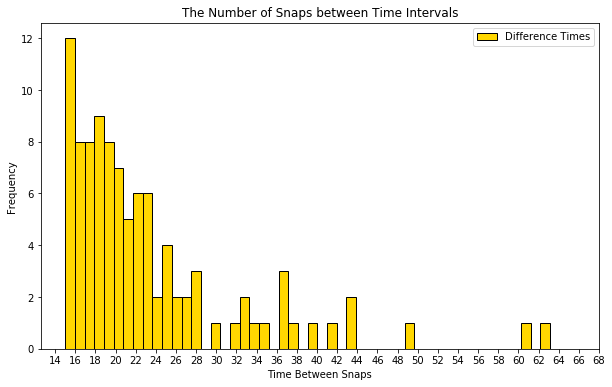

In [13]:
dfSnapDiff = dfSnapTimes.diff()

fig, ax = plt.subplots(1,1, figsize = (10,6))

ax.hist(dfSnapDiff.loc[1::, 'snaps'],        # Otherwise first value is a NaN and creates weird plot
        bins = 50,
        color = "gold",
        edgecolor = "black",
        label = "Difference Times")
ax.set_xlabel("Time Between Snaps")
ax.set_ylabel("Frequency")
ax.set_title("The Number of Snaps between Time Intervals")
ax.set_xticks(range(14, 70, 2))
ax.legend();

**Part B:** Compute a 90% confidence interval (to 4 decimal places) for the mean of the inter-snap arrival time. If you use any theorem(s) in your calculation, be sure to state what they are and why the theorem(s) can be applied. 

We used the Central Limit Theorem because we needed to know that the sample mean estimates a normal distribution as the number of trails increases.

In [14]:
xBar = np.mean(dfSnapDiff["snaps"])
std = math.sqrt(np.var(dfSnapDiff["snaps"]))
sqrtN = math.sqrt(len(dfSnapDiff))
zAlpha = stats.norm.ppf(1 - 0.05)

ci = [xBar - (zAlpha * std / sqrtN), xBar + (zAlpha * std / sqrtN)]
print(ci)

[21.923736325773959, 24.923516868150855]


In [15]:
stats.norm.ppf(0.05)

-1.6448536269514729

**Part C:** Speculate: what would happen if you hadn't included all the data in your confidence interval calculation above? Specifically, if you used only 30 of your data points to compute a confidence interval, would it be wider or less wide? Why?

The interval would be wider because the $\pm z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$ term would be larger because the denominator would be less. This makes sense because the data will have fewer samples and be less refined, so the interval in which the true mean could located would be less narrowed down.

**Part D:** Write a function to confirm what you have written above. For each value of $n$ between $30$ and the total number of data points, compute a 90% CI using the first $n$ inter-arrival times. Plot the CIs (vertical axis) against $n$ (horizontal axis). Plot the means as black X symbols, with vertical "errorbars" for the CIs colored gold. See Matplotlib's [errorbar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html) plot type. 

In [16]:
def CIPlot():
    fig,ax = plt.subplots(1,1,figsize = (10,6))
    
    lenth = len(dfSnapDiff)
    
    # The confidence stays the same over all intervals so can calculate outside of loop
    zAlpha = stats.norm.ppf(1 - 0.05)
    
    for i in range(30, lenth):
        
        xBar = np.mean(dfSnapDiff["snaps"].head(i))
        std = math.sqrt(np.var(dfSnapDiff["snaps"]))
        sqrtN = math.sqrt(i)
        ci = [xBar - (zAlpha * std / sqrtN), xBar + (zAlpha * std / sqrtN)]
        ax.plot([i,i], ci, color = "gold")
        ax.plot(i, xBar, color = "black", marker = "x")
    
    ax.set_xlim([29, lenth])
    plt.xticks(range(30, lenth+1, 5))
    ax.set_xlabel("Number of Data Points")
    ax.set_ylabel("Time Interval Between Snaps")
    ax.set_title("90% Confidence Intervals of Time Between Snaps as Number of Data Points Increases")

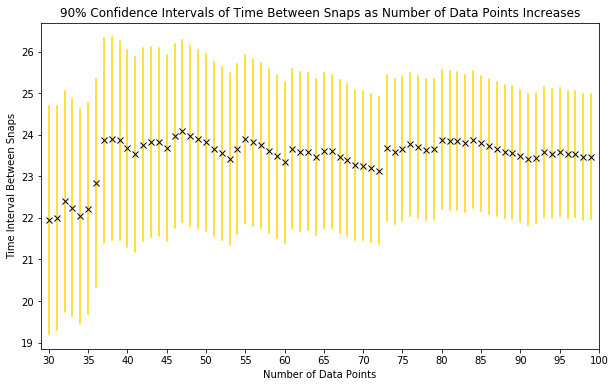

In [17]:
CIPlot()

<br>

---
<a/ id='p4'></a>
[Back to top](#top)
### [25 points] Problem 4 - Not-so-Easy Peasy Plinko 

[Plinko](http://priceisright.wikia.com/wiki/Plinko), the shining jewel of the gameshow [Price is Right](https://en.wikipedia.org/wiki/The_Price_Is_Right), is a staple of American culture.  Luckily for us, it's also chalk-full of interesting ideas from probability and statistics. The game involves dropping a disc onto an inclined board of pegs and letting it bounce around until it lands in a bin with an associated cash value. Players get to drop some number of discs down the Plinko board and keep their winnings.

In class we looked at a simplified version of Plinko:  

![](http://www.cs.colorado.edu/~tonyewong/home/resources/plinko/plinko1.png)

In real life, Plinko has boundaries, positioned symmetrically around the center $c$ at positions $\ell$ and $r$ s.t. $|c-\ell| = |c+r|$. The effect of the boundaries are that when the Plinko disc hits the boundary, it can only move back toward the center. In other words, if the disc hits the boundary at $\ell$, it can only go right at that level. Likewise, if the disc hits the boundary at $r$, it can only go left at that level. 

For instance, the following board depicts a Plinko game with boundaries at $0.5$ (halfway between the centers of Buckets 0 and 1) and $5.5$ (halfway between Buckets 5 and 6)  The red pegs indicate boundary pegs on which the disc always moves toward the center.   

![](http://www.cs.colorado.edu/~tonyewong/home/resources/plinko/plinko2.png)


**Part A**: First, let's consider the case without boundaries. 

**[1]** Write a simulator of Plinko that models the disc moving through each of the 6 rows of pegs to its final destination in one of the 7 bins. Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least 10,000 trials and plot a density histogram estimate of the PMF of $X$ when the probability of moving left when hitting a peg is equal to `p_right = 0.5`. Note that in this set-up, you must always drop the disc above bin 3.

Your code should take as arguments:
* `n` -- number of Plinko trials
* `p_right` -- the probability of bouncing right at any given peg

Your code should return some kind of an array-like object that can be used to plot a histogram of the results of your `n` Plinko games.

**[2]** Then, plot a density histogram of the results.  Run your simulation for at least 10,000 trials.  The bins should be centered above the corresponding bin numbers, and axes should be labeled appropriately.

In [18]:
[i for i in range(6)]

[0, 1, 2, 3, 4, 5]

In [19]:
def SimplePlinko(sims, p_right):
    rand = [np.sum(np.random.choice([0,1], p = [1-p_right, p_right], size = 6)) for i in range(sims)]
#     x = np.random.binomial(n=6, p = p_right, size = sims)
    return rand

In [20]:
def PlotPlinko(x):
    fig,ax = plt.subplots(1,2,figsize = (15,5))
    
    ax[0].hist(x,
               range=(0,7),
               align = 'left',
               bins = 7,
               facecolor = "teal",
               edgecolor = "black")
    ax[0].set_xlabel("Bucket the Ball Lands In")
    ax[0].set_ylabel("Frequency")
    ax[0].set_title(" Simulated Frequency of Bucket Locations for 10000 Simulations")
    
    ax[1].hist(x, range = (0,7), align = 'left', density = True, bins = 7, facecolor = "teal", edgecolor = "black")
    ax[1].set_xlabel("Bucket the Ball Lands In")
    ax[1].set_ylabel("Probability")
    ax[1].set_title("Simulated Probability of Bucket Locations")

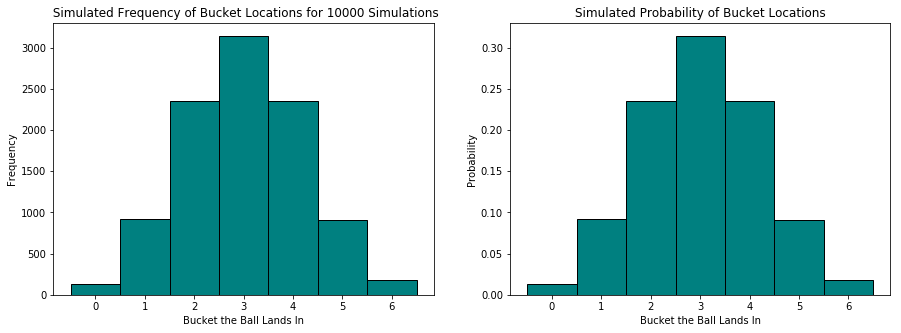

In [21]:
x = SimplePlinko(10000, 0.5)
PlotPlinko(x)

**Part B**: Let $X$ be the random variable corresponding to the Bucket that the disc lands in for the situation in **Part A**.  Write down the **true** PMF for $X$. (**Hint**: It might be helpful to reflect back on the discussion from Lecture 11). 

**Then**, check that your empirical (estimated) probabilities for landing in Bucket 0, 1, 2, or 3 compare to the true probabilities. Comment on whether or not they agree, and be sure to clearly state what the probabilities you've calculated are.

The true PMF of $X$ is a binomial distribution where a success represents the ball moving to the right. For this binomial, the number of trials $n$ is 6 because there are 6 rows. 

$P(x=k) = {n \choose k}(p)^k(1-p)^{n-k}$

Now with $X \sim Binom(6,0.5)$, we can find that the true probabilities are:

* $P(x = 0) = {6 \choose 0}(0.5)^0(1-0.5)^6 \approx 0.0156$
* $P(x = 1) = {6 \choose 1}(0.5)^1(1-0.5)^5 \approx 0.0928$
* $P(x = 2) = {6 \choose 2}(0.5)^2(1-0.5)^4 \approx 0.2344$
* $P(x = 3) = {6 \choose 3}(0.5)^3(1-0.5)^3 \approx 0.3125$

These numbers agree with our simualted values as they are very similar:

* $P(x=0)$: Simulated $\approx 0.017$, Calculated $= 0.0156$.
* $P(x=1)$: Simulated $\approx 0.091$, Calculated $= 0.0928$.
* $P(x=2)$: Simulated $\approx 0.231$, Calculated $= 0.2344$.
* $P(x=0)$: Simulated $\approx 0.315$, Calculated $= 0.3125$.

In [22]:
# Binomial Distribution
# Binom(6, 0.5) ~ P(x=k) = (n choose k)*p^k*(1-p)^(n-k)
def Binom(n, p, k):
    choose = math.factorial(n) / math.factorial(k) / math.factorial(n-k) # Calculate choose
    prob = choose * (p**k) * (1-p)**(n-k)
    return prob

In [23]:
# Find the true probabilities
for i in range(4):
    print("The probability of landing in bucket {} is {:0.4f}".format(i, Binom(6, 0.5, i)))

The probability of landing in bucket 0 is 0.0156
The probability of landing in bucket 1 is 0.0938
The probability of landing in bucket 2 is 0.2344
The probability of landing in bucket 3 is 0.3125


In [24]:
# Find the simulated probabilities
def simProbs(arr):
    numbers, counts = np.unique(arr, return_counts=True)
    y = zip(numbers, counts)
    d = dict(y)
    # d[0]/len(x)
    probs = [d[ii]/len(arr) for ii in d]
    return(probs)

probs = simProbs(x)
print(probs)

[0.013599999999999999, 0.092399999999999996, 0.23569999999999999, 0.31440000000000001, 0.23569999999999999, 0.090300000000000005, 0.017899999999999999]


**Part C.** 

**[1]** Now write a simulator for Plinko with boundaries, and an argument for the number of rows. Your code should be similar to your code from **Part A**, with the following arguments:
* `n` -- number of Plinko trials
* `p_right` -- the probability of bouncing right at any given peg
* `left_bound` -- the left boundary
* `right_bound` -- the right boundary
* `initial` -- the initial bin that you drop the disc above
* `n_rows` -- number the rows on the plinko board. The board must have number of pegs in the bottom row equal to `n_rows`.

**[2]** As a sanity check, use a 1-row board with `p_right=0.85`, and no left/right boundaries.  Run 10,000 trials and plot a density histogram of the results. The bins should be centered above the corresponding bin numbers, and the axes should be labeled. Does your result match you expect should happen? Explain.

In [25]:
def HarderPlinko(sims, p_right, left_bound, right_bound, initial, n_rows):
    bins = np.zeros(sims)
    for ii in range(sims): # Perform number of simulations
        
        loc = initial # Set the initial location of the ball
        
        for jj in range(n_rows): # Must drop to the bottom.
            # Determine if the ball is on a wall
            if loc == left_bound:
                loc += 0.5
                continue
            elif loc == right_bound:
                loc -= 0.5
                continue
            # If not on a wall, then go right with prob p or left with prob 1-p
            bounce = np.random.choice([-0.5,0.5], p = [1- p_right, p_right])
            loc += bounce
        bins[ii] = loc
    return bins

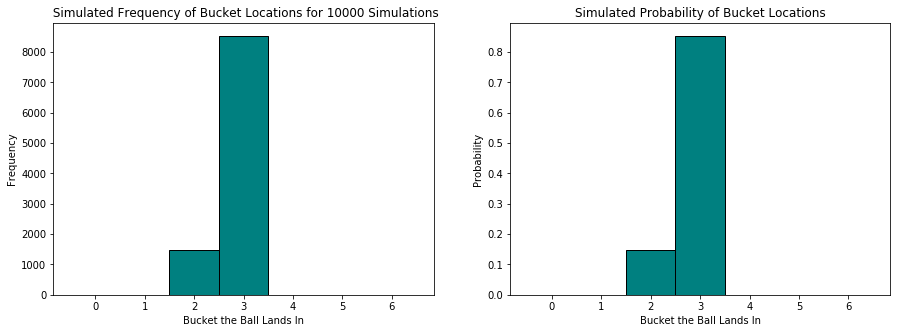

In [26]:
x = HarderPlinko(10000, 0.85, -0.5, 1.5, 3, 1)
PlotPlinko(x)

From the figures above, the function works. As expected, the number of balls that land in right bin is about 8500, or 85% of the total number of trials.

**Part D.**  Run 10,000 trials with left and right boundaries at 0.5 and 5.5, respectively, and a 6-row board. Drop the disc above Bin 3. Plot a density histogram of the results, simiarly to **Part C**.

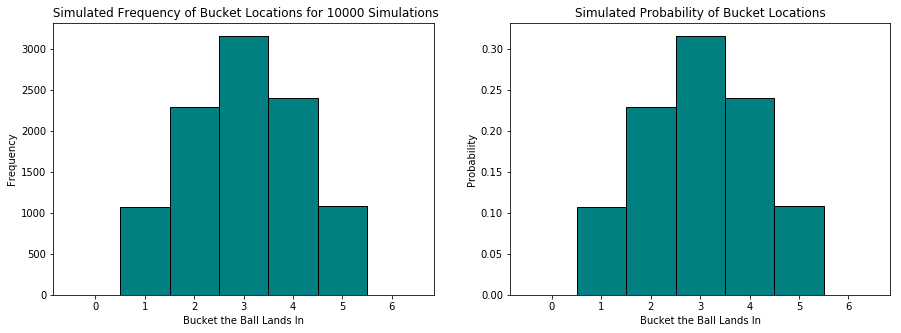

In [27]:
x = HarderPlinko(10000, 0.5, 0.5, 5.5, 3, 6)
PlotPlinko(x)

**Part E**:  Let $X$ be the random variable corresponding to the Bucket that the disc lands in for the situation in **Part D**.  Compare the approximate PMF for this board to the no-boundary board from **Part A/B**. Explain the mechanism that causes the differences between the two PMFs in words. Then, write down the **true** PMF for $X$.

The table below shows the simulated probabilities of Plinko with and without boundaries. The probabilities are approxmiations because of simulation and are rounded to the fourth digit.

| | No Boundaries | Boundaries | 
|---|---|---|
| P(x=0)| 0.0158 | 0 |
| P(x=1)| 0.0927 | 0.1067 |
| P(x=2)| 0.2384 | 0.2396 |
| P(x=3)| 0.3117 | 0.3153 |
| P(x=4)| 0.2318 | 0.2391 |
| P(x=5)| 0.0941 | 0.1093 |
| P(x=6)| 0.0155 | 0 |

From the table we can see that main difference is that when $x=0$ and $x=6$, the bounded simulation has probability 0 whereas the simulation without boundaries has a small probability of landing in those bins. When $x=1$ and $x=5$, the probability of the bounded simulation is greater than the unbounded probabilities. We can see that the probability at $x=1$ of the bounded sim is the sum of the probabilities when $x=0$ and $x=1$ of the unbounded sim. This makes sense because all of the paths that would've reached bin 0 are instead redirected into bin 1, so the probability of bounded bin 1 would be the sum of the unbounded bins 0 and 1. The table also shows that the probabilities for $x=2,3,4,$ are approximately the same, meaning that setting the bounds at $0.5$ and $5.5$ did not affect the probability of landing in an inner bin.

The PMF for the bounded simulation is:
$$
f(k) = P(x=k) = \left\{
        \begin{array}{ll}
            0 \quad \quad k \leq 0 \\
            {6 \choose 1}(p)^1(1-p)^{5} + {6 \choose 0}(p)^0(1-p)^{6} \quad k=1 \\
            {6 \choose k}(p)^k(1-p)^{6-k} \quad k = 2,3,4 \\
            {6 \choose 5}(p)^5(1-p)^{1} + {6 \choose 6}(p)^6(1-p)^{0} \quad k=5 \\
            0 \quad \quad k \geq 6
        \end{array}
    \right.
$$


In [28]:
print(simProbs(x))

[0.10730000000000001, 0.22869999999999999, 0.31540000000000001, 0.24010000000000001, 0.1085]


**Part F**: Suppose I challenge you to a _friendly_ game of Plinko on the board from **Parts D** and **E**.
* If the disc lands in bins 1 or 5, I will pay you \$1
* If the disc lands in bin 3, I will pay you \$4
* If the disc lands in bins 2 or 4, I will pay you nothing
* I will also charge you a flat fee for each disc that you play.

How much should I charge you per disc so that we break even in the long run? 

In [29]:
# Need to calculate the expected value of the game
# Create an array of the possible winnings for each bucket
winnings = [1, 0, 4, 0, 1]
# Create an array of the probabilities of landing in each bucket
probs = simProbs(x)
# Find expected value by finding sum of winning*prob
expValue = 0
for i in range(len(probs)):
    expValue = expValue + (probs[i] * winnings[i])
print(expValue)

1.4774


The expected amount of money won per round is about \$1.48. So in the long run, you should charge $\sim$ \$1.48 for us to break even.

***

### Challenge Fun Problem [0 points] - Real-Deal Plinko 
***

Implement a full-blown Plinko simulator based on the actual board from Price is Right, which allows you to choose where to place the disc at the top of the board.  

![alt text](https://i.pinimg.com/736x/7d/4b/5b/7d4b5b9ba5cdeceea16433eaadeeaf13--mash-game-plinko-game.jpg)

You can actually do this using mostly your code from **Problem 3** and some careful handling of the boundaries relative to where you drop the disc.  Investigate questions like "What is the optimal position to drop the disc to maximize expected winnings?" and "What are the expected winnings if you play Plinko optimally?"

Once you're done with that, it's time to go full-on Meta-Plinko.  Suppose the boundaries of the Plinko board are in their true positions from the real game show, but the board can have an arbitrary number of rows.  Is there a minimum number of rows the board can have at which point the PMF for the distribution becomes approximately uniform?  If not, is there a Bucket, or set of Buckets, that always have a greater chance of claiming the disc? 


<br>

---
### Notes

<a/ id='rad'></a> 200 mSv is somewhere below Chernobyl levels of exposure, but more radiation than you would want with regard to potentially increasing your risk of cancer. It's probably too high, but it is a nice round number! More information [here](https://www.theguardian.com/news/datablog/2011/mar/15/radiation-exposure-levels-guide).

[Back to Problem 2](#p2)